<a href="https://colab.research.google.com/github/vibhuvanjari-Kellogg/classification-modeling-Titanic/blob/main/Mod_4_Titanic_Part_1_EDA_Data_Cleanup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

Link to access this code - https://colab.research.google.com/drive/1alhR1osGKoX7YIvuWhXdu1Gcpa0RPhid

Data taken from - https://www.kaggle.com/c/titanic/data

Part 2: https://colab.research.google.com/drive/1OhL-lseBrsHbzX33VEzRQuRTYuQXHu5s#scrollTo=9HWrWlpE3gFQ

### Import modules and data files

In [ ]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import statsmodels.formula.api as smf

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# To ensure all columns are displayed when calling data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_train_original = pd.read_csv('train.csv')
df_test_original = pd.read_csv('test.csv')

In [ ]:
df_train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#df_train_original.describe()
df_test_original.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### EDA

#### Establishing base survival rates across different features

In [ ]:
# Print what percent survived
print(df_train_original['Survived'].mean())

0.3838383838383838


In [ ]:
# Print what percent survived by Sex
print(df_train_original.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [ ]:
# Print what percent survived by Pclass
print(df_train_original.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
# Print what percent survived by Age decile
df_train_original['Age_Decile'] = pd.qcut(df_train_original['Age'], 10, labels=False, duplicates='drop')
print(df_train_original.groupby('Age_Decile')['Survived'].mean())

Age_Decile
0.0    0.584416
1.0    0.390805
2.0    0.283582
3.0    0.371429
4.0    0.393443
5.0    0.393939
6.0    0.483516
7.0    0.358491
8.0    0.397436
9.0    0.343750
Name: Survived, dtype: float64


#### Cabin

**TAKEAWAY:** There is not much information the variable "Cabin" gives us in addition to Pclass. The deck level doesn't or room number doesn't neccessarily give us much information on survival rate. There is a lot of missing samples here so it may be best to eliminate this variable.

In [ ]:
# Determine if Cabin has importance in predicting survival
df_train_original['Cabin'].value_counts()

# Group by 'Cabin' and 'Survived', then count
cabin_survival_counts = df_train_original.groupby(['Cabin', 'Survived']).size().unstack(fill_value=0)

# Rename the columns for clarity
cabin_survival_counts.columns = ['Survived_0', 'Survived_1']

# Reset index for a clean table
cabin_survival_counts = cabin_survival_counts.reset_index()

print(cabin_survival_counts)

               Cabin  Survived_0  Survived_1
0                A10           1           0
1                A14           1           0
2                A16           0           1
3                A19           1           0
4                A20           0           1
5                A23           0           1
6                A24           1           0
7                A26           0           1
8                A31           0           1
9                A32           1           0
10               A34           0           1
11               A36           1           0
12                A5           1           0
13                A6           0           1
14                A7           1           0
15              B101           0           1
16              B102           1           0
17               B18           0           2
18               B19           1           0
19               B20           0           2
20               B22           1           1
21        

No clear pattern in cabin names versus survival.

Further research about the Titanic's layout gave me the following information:
*  The letter indicated the deck level.
  *   First class was located on the upper decks: A Deck (Promenade), B Deck (Bridge), C Deck (Shelter), some on D Deck (Saloon).
  *   Second class was located mainly on D Deck and E Deck (midship, closer to the center for stability).
  *   Third class was located lower down on F Deck and G Deck.
  *   Many Third Class passengers had no cabin number listed, they were assigned general spaces. This explains the large amount of missing cabin data.
*  The number suggested location along the length of the ship but it wasn’t strictly sequential or geographic.
  *   Lower numbers were usually further forward (closer to the bow/front).
  *   Higher numbers were usually toward the back (stern).




In [ ]:
# Group by 'Pclass' and count missing 'Cabin' values
cabin_missing_by_pclass = df_train_original.groupby('Pclass')['Cabin'].apply(lambda x: x.isnull().sum()).reset_index(name='Cabin_Missing_Count')

# Calculate total people in each Pclass
pclass_counts = df_train_original['Pclass'].value_counts().sort_index().reset_index()
pclass_counts.columns = ['Pclass', 'Total_People']

# Merge the two DataFrames
cabin_missing_by_pclass = pd.merge(cabin_missing_by_pclass, pclass_counts, on='Pclass')

# Calculate the ratio
cabin_missing_by_pclass['Missing_Ratio'] = cabin_missing_by_pclass['Cabin_Missing_Count'] / cabin_missing_by_pclass['Total_People']

# Display the results
print(cabin_missing_by_pclass)

   Pclass  Cabin_Missing_Count  Total_People  Missing_Ratio
0       1                   40           216       0.185185
1       2                  168           184       0.913043
2       3                  479           491       0.975560


From the data it is not possible to conclude everyone with missing Cabin data travelled in third class.

In [ ]:
# Split cabin data into two parts, alphabet data and numeric data
df_train_original['Cabin_Alphabet'] = df_train_original['Cabin'].str.extract(r'([A-Za-z]+)')
df_train_original['Cabin_Number'] = df_train_original['Cabin'].str.extract(r'(\d+)')

# Convert 'Cabin_Number' to numeric, handling errors
df_train_original['Cabin_Number'] = pd.to_numeric(df_train_original['Cabin_Number'], errors='coerce')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  TestYes      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


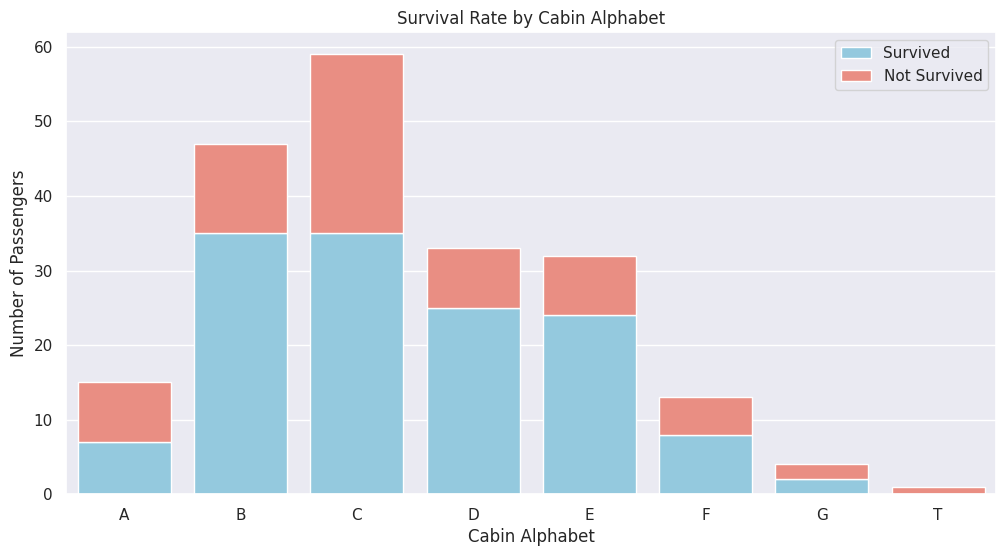

In [ ]:
# Checking to see if deck level has a significant impact on survival rate.

# Group by 'Cabin_Alphabet' and 'Survived', then count
cabin_alphabet_survival_counts = df_train_original.groupby(['Cabin_Alphabet', 'Survived']).size().unstack(fill_value=0)

# Rename the columns for clarity
cabin_alphabet_survival_counts.columns = ['Survived_0', 'Survived_1']

# Reset index for a clean table
cabin_alphabet_survival_counts = cabin_alphabet_survival_counts.reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Cabin_Alphabet', y='Survived_1', data=cabin_alphabet_survival_counts, color='skyblue', label='Survived')
sns.barplot(x='Cabin_Alphabet', y='Survived_0', data=cabin_alphabet_survival_counts, color='salmon', label='Not Survived', bottom=cabin_alphabet_survival_counts['Survived_1'])

plt.title('Survival Rate by Cabin Alphabet')
plt.xlabel('Cabin Alphabet')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

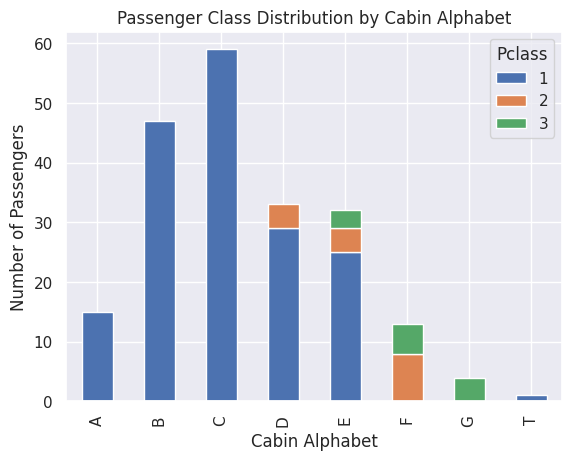

In [ ]:
# Checking to see if deck level has a correlation with Pclass

# Group by 'Cabin_Alphabet' and 'Pclass', then count
cabin_alphabet_pclass_counts = df_train_original.groupby(['Cabin_Alphabet', 'Pclass']).size().unstack(fill_value=0)

# Reset index for a clean table
cabin_alphabet_pclass_counts = cabin_alphabet_pclass_counts.reset_index()

# Plotting
cabin_alphabet_pclass_counts.plot(x='Cabin_Alphabet', kind='bar', stacked=True,
                                  title='Passenger Class Distribution by Cabin Alphabet')
plt.xlabel('Cabin Alphabet')
plt.ylabel('Number of Passengers')
plt.legend(title='Pclass')
plt.show()

*  Everyone in decks A, B and C were 1st class.
*  Everyone in deck G was 3rd class.



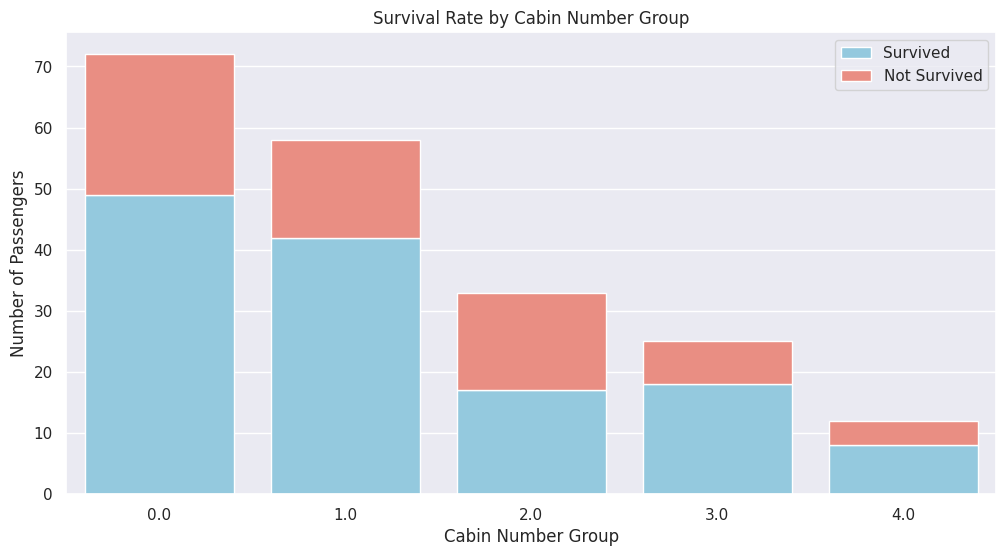

In [ ]:
# Checking to see if cabin number has an impact on survival rate

# Create 5 groups for Cabin_Number using pd.cut
df_train_original['Cabin_Number_Group'] = pd.cut(df_train_original['Cabin_Number'], bins=5, labels=False)

# Group by 'Cabin_Number_Group' and 'Survived', then count
cabin_number_group_survival_counts = df_train_original.groupby(['Cabin_Number_Group', 'Survived']).size().unstack(fill_value=0)

# Rename the columns for clarity
cabin_number_group_survival_counts.columns = ['Survived_0', 'Survived_1']

# Reset index for a clean table
cabin_number_group_survival_counts = cabin_number_group_survival_counts.reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Cabin_Number_Group', y='Survived_1', data=cabin_number_group_survival_counts, color='skyblue', label='Survived')
sns.barplot(x='Cabin_Number_Group', y='Survived_0', data=cabin_number_group_survival_counts, color='salmon', label='Not Survived', bottom=cabin_number_group_survival_counts['Survived_1'])

plt.title('Survival Rate by Cabin Number Group')
plt.xlabel('Cabin Number Group')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

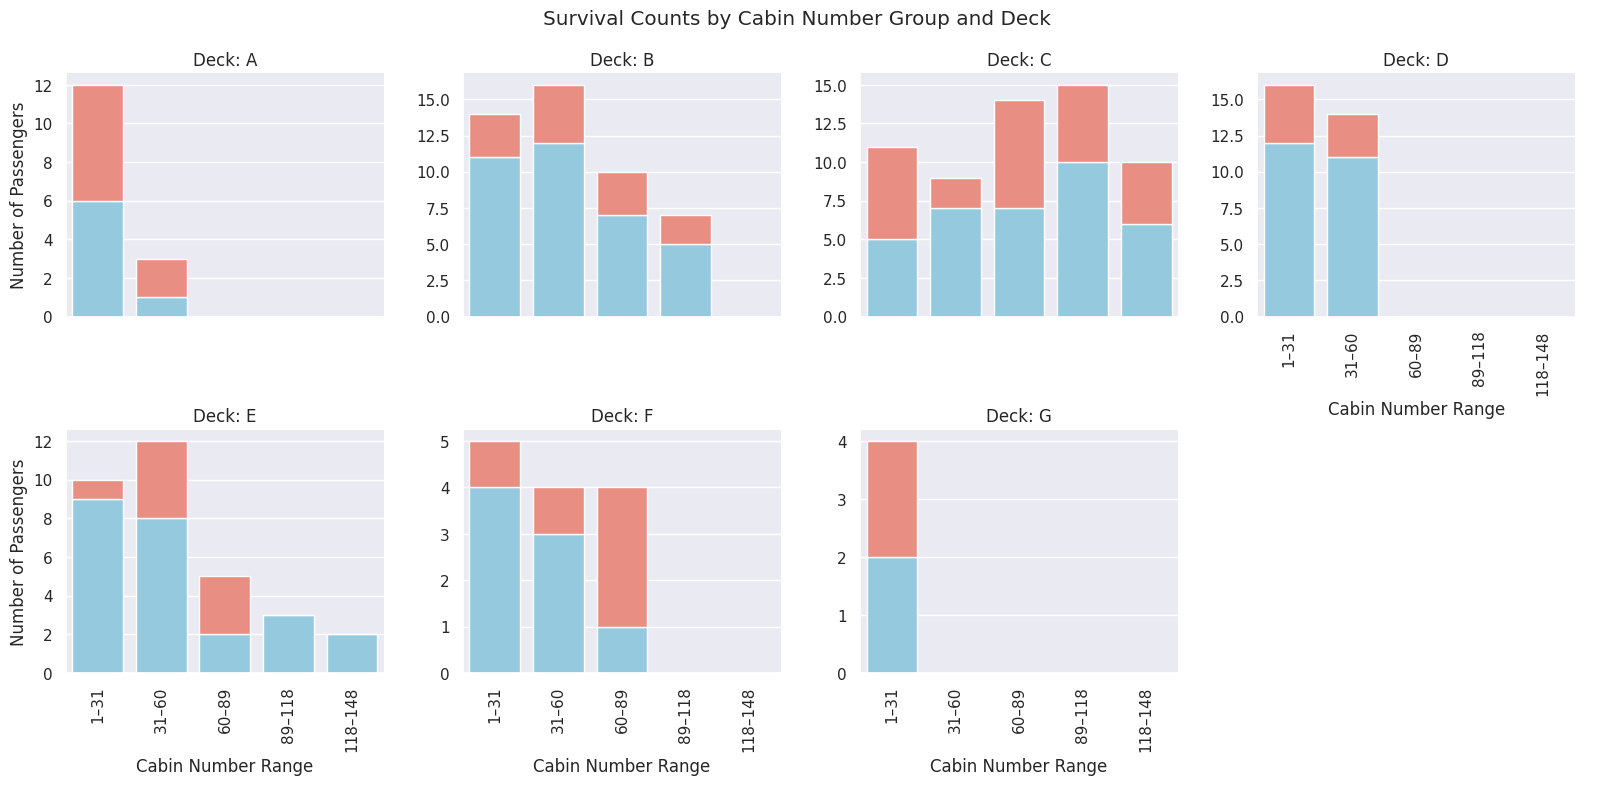

In [ ]:
# Checking to see if cabin number has an impact on survival rate, faceted by deck level.

# 1. Ensure Cabin_Number is numeric
df_train_original['Cabin_Number'] = pd.to_numeric(df_train_original['Cabin_Number'], errors='coerce')

# 2. Create bins and labels
bin_cut = pd.cut(df_train_original['Cabin_Number'], bins=5)
bin_edges = bin_cut.cat.categories  # Correct way to access bin ranges

bin_labels = [f"{int(edge.left)}–{int(edge.right)}" for edge in bin_edges]

# Assign bin labels
df_train_original['Cabin_Number_Group'] = pd.cut(df_train_original['Cabin_Number'], bins=5, labels=bin_labels)

# 3. Group by Cabin_Alphabet, Cabin_Number_Group, and Survived
cabin_grouped = df_train_original.groupby(['Cabin_Alphabet', 'Cabin_Number_Group', 'Survived'], observed=True).size().unstack(fill_value=0).reset_index()

# Rename columns for clarity
cabin_grouped.columns = ['Cabin_Alphabet', 'Cabin_Number_Group', 'Survived_0', 'Survived_1']

# Optional: Remove rows with missing Cabin_Alphabet
cabin_grouped = cabin_grouped[cabin_grouped['Cabin_Alphabet'].notna()]

# 4. Plotting with FacetGrid
g = sns.FacetGrid(cabin_grouped, col='Cabin_Alphabet', col_wrap=4, height=4, sharey=False)

def facet_barplot(data, color, **kwargs):
    sns.barplot(x='Cabin_Number_Group', y='Survived_1', data=data, color='skyblue', **kwargs)
    sns.barplot(x='Cabin_Number_Group', y='Survived_0', data=data, color='salmon', bottom=data['Survived_1'], **kwargs)
    plt.xticks(rotation=90)

g.map_dataframe(facet_barplot)
g.add_legend()
g.set_axis_labels("Cabin Number Range", "Number of Passengers")
g.set_titles(col_template="Deck: {col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Survival Counts by Cabin Number Group and Deck')
plt.show();

There is no clear pattern here and not enough samples to conclude anything with confidence.

In [ ]:
# Restoring original train data.
df_train_original = pd.read_csv('train.csv')

#### Other EDA

<Axes: xlabel='Pclass', ylabel='count'>

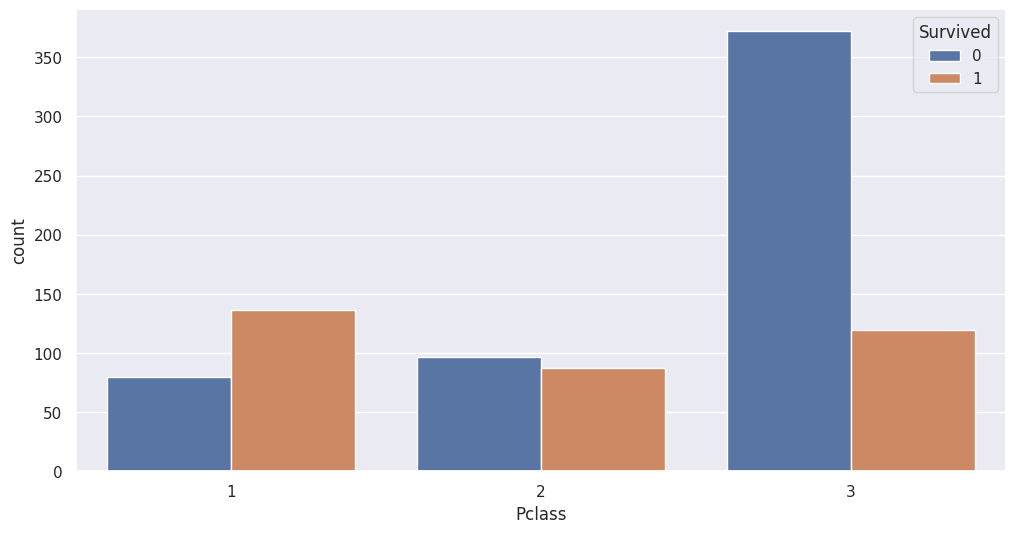

In [ ]:
# Plot Pclass vs Survived
plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=df_train_original)

<Axes: xlabel='Embarked', ylabel='count'>

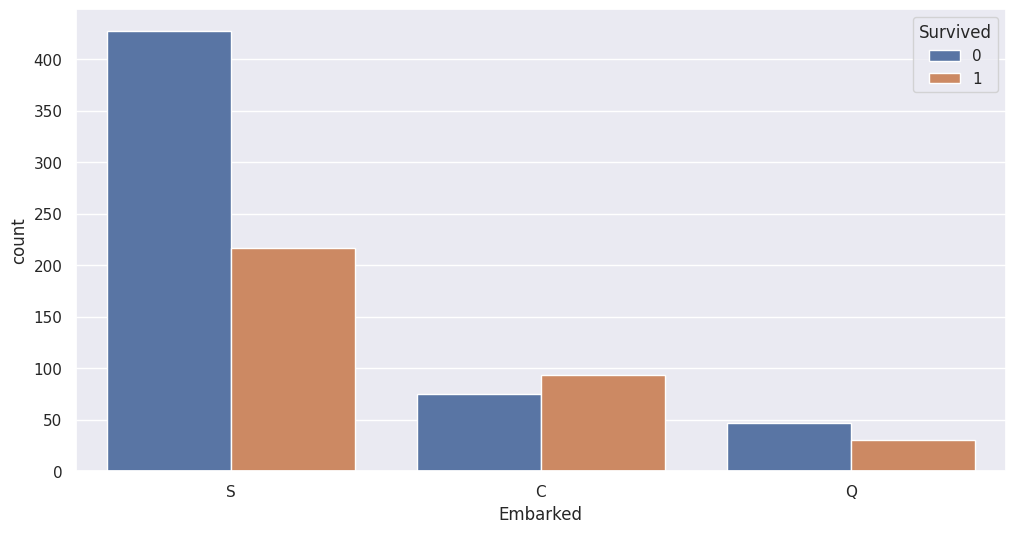

In [ ]:
# Plot Embarked vs Survived
plt.figure(figsize=(12, 6))
sns.countplot(x='Embarked', hue='Survived', data=df_train_original)

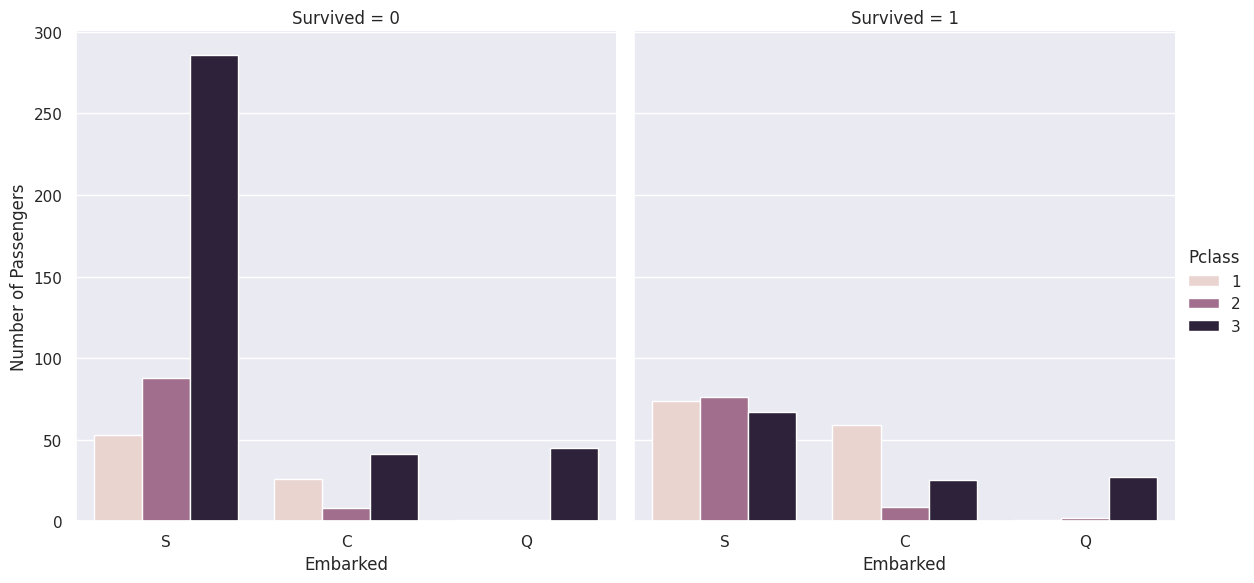

In [ ]:
# Plot Embarked vs Survived faceted by Survived
g = sns.catplot(
    x='Embarked', hue='Pclass', col='Survived',
    kind='count', data=df_train_original,
    height=6, aspect=1
)
g.set_titles("Survived = {col_name}")
g.set_axis_labels("Embarked", "Number of Passengers")
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

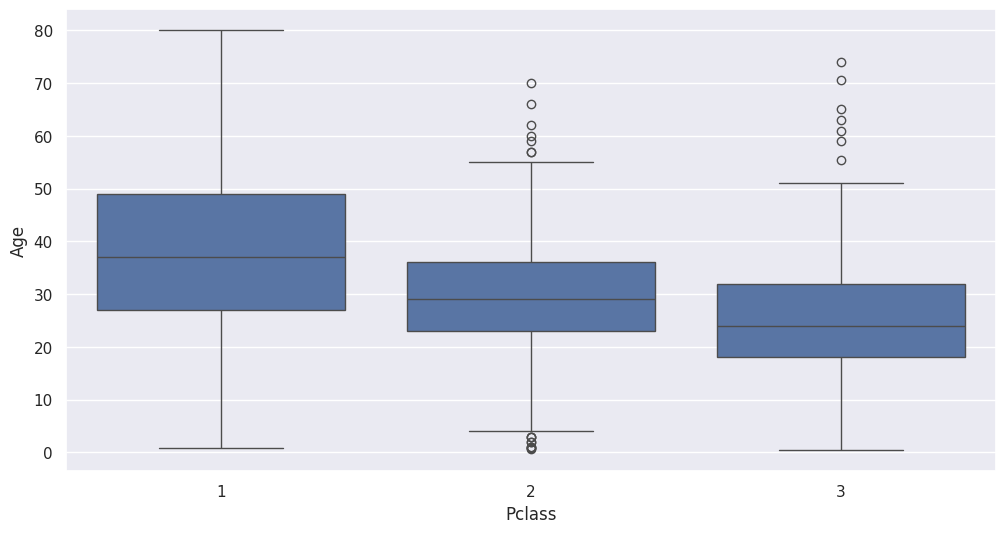

In [ ]:
# Plot Age vs Pclass
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=df_train_original)

<Axes: xlabel='Survived', ylabel='Age'>

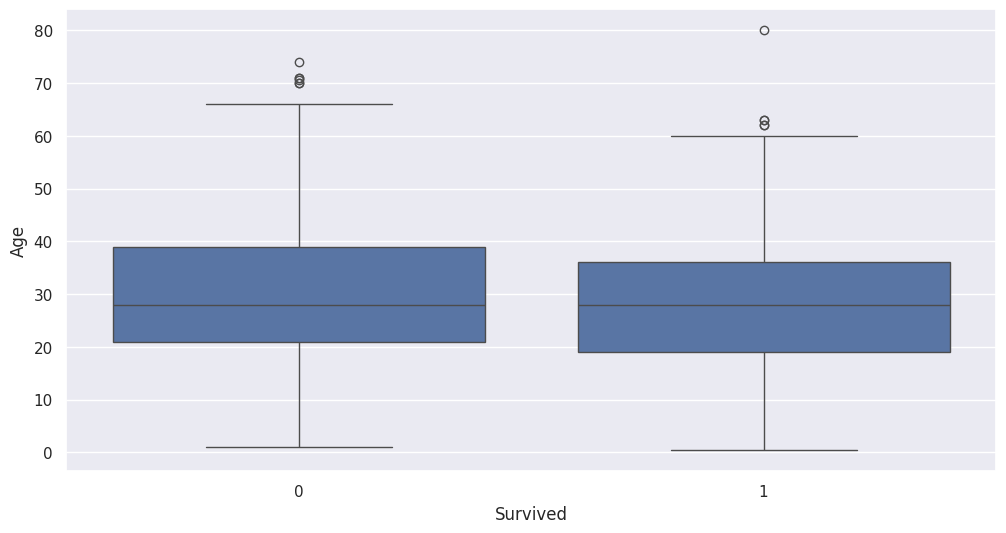

In [ ]:
# Plot Age vs Survived
plt.figure(figsize=(12, 6))
sns.boxplot(x='Survived', y='Age', data=df_train_original)

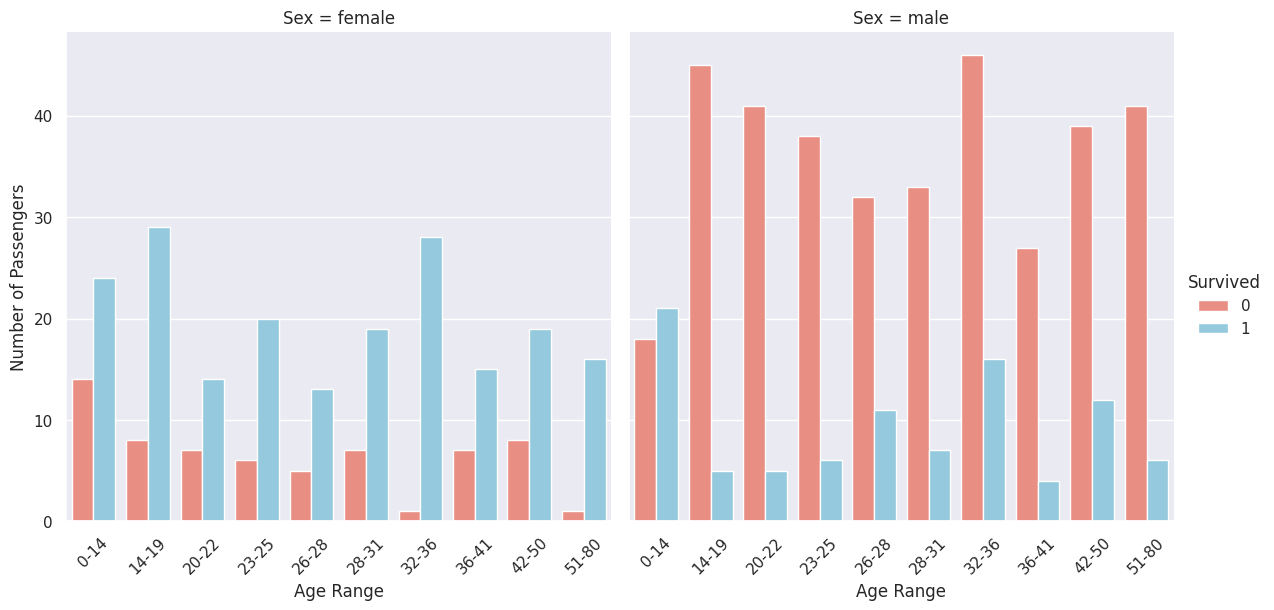

In [ ]:
# Plot Age (decile) vs Survived faceted by Sex

# 1. Create Age Deciles
df_train_original['Age_Decile'] = pd.qcut(df_train_original['Age'], 10, labels=False, duplicates='drop')

# 2. Get Age Range Labels
age_ranges = df_train_original.groupby('Age_Decile')['Age'].agg(['min', 'max'])
x_labels = [f"{int(row['min'])}-{int(row['max'])}" for _, row in age_ranges.iterrows()]

# 3. Group by Sex, Age_Decile, and Survived
age_survival_counts = df_train_original.groupby(['Sex', 'Age_Decile', 'Survived'], observed=True).size().reset_index(name='Count')

# 4. Plotting
g = sns.catplot(
    data=age_survival_counts, kind='bar',
    x='Age_Decile', y='Count', hue='Survived', col='Sex',
    height=6, aspect=1, palette={0: 'salmon', 1: 'skyblue'}
)

# 5. Customize
g.set_titles("Sex = {col_name}")
g.set_axis_labels("Age Range", "Number of Passengers")
g.set_xticklabels(x_labels, rotation=45)
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

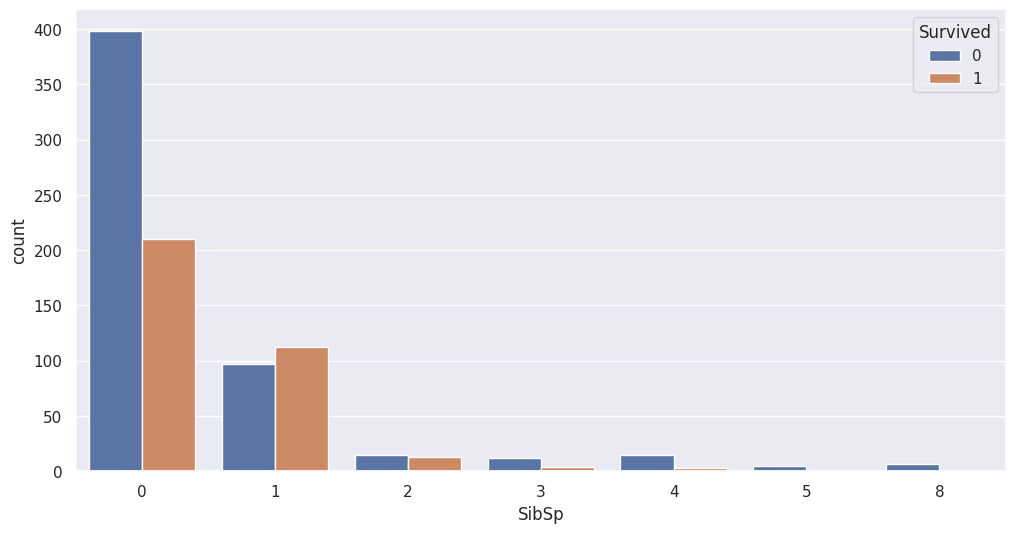

In [ ]:
# Plot SibSp vs Survived
plt.figure(figsize=(12, 6))
sns.countplot(x='SibSp', hue='Survived', data=df_train_original)

In [ ]:
# Restoring original train data.
df_train_original = pd.read_csv('train.csv')

### Merge and clean data

#### Merge data

In [ ]:
# Create working datasets
df_train = df_train_original
df_test = df_test_original

# Add a variable to both df_train and df_test indicating whether train or test dataset
df_train['TestYes'] = 0
df_test['TestYes'] = 1

# Create merged dataset used to cleanup data
df_merged = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  TestYes      1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


#### Creating a variable for ticket type

In [ ]:
# Split numeric text into a seperate Ticket feature
df_merged['Ticket_Number'] = df_merged['Ticket'].str.extract(r'(\d+)$')
df_merged['Ticket_Group'] = df_merged['Ticket'].str.replace(r'\d+$', '', regex=True)
df_merged['Ticket_Group'] = df_merged['Ticket_Group'].str.replace(' ', '', regex=False)

In [ ]:
# If 'Ticket_Number' is N/A set to 0
df_merged['Ticket_Number'] = df_merged['Ticket_Number'].fillna(0)

# If 'Ticket_Group' is " " set to "Regular"
df_merged['Ticket_Group'] = df_merged['Ticket_Group'].replace(r'^\s*$', 'Regular', regex=True)

In [ ]:
# Count by Ticket_Group
df_merged['Ticket_Group'].value_counts()

,count
Ticket_Group,
Regular,957
PC,92
C.A.,46
STON/O2.,21
SOTON/O.Q.,16
W./C.,14
A/5,12
CA.,12
SC/PARIS,11


In [ ]:
# Merge Ticket_Group "A/5", "A/5.", "A.5.", "A./5." into "A/5"
df_merged['Ticket_Group'] = df_merged['Ticket_Group'].replace(['A/5', 'A/5.', 'A.5.', 'A./5.'], 'A/5')

# Merge Ticket_Group "A/4", "A/4.", "A4.", "S.C./A.4.", "SC/A4" into "A/4"
df_merged['Ticket_Group'] = df_merged['Ticket_Group'].replace(['A/4', 'A/4.', 'A4.', 'S.C./A.4.'], 'A/4')

# Merge Ticket_Group "C.A.", "CA.", "CA", "C.A./SOTON" into "CA"
df_merged['Ticket_Group'] = df_merged['Ticket_Group'].replace(['C.A.', 'CA.', 'CA'], 'CA')

# Merge Ticket_Group "SOTON/O.Q.", "SOTON/O2" and "SOTON/OQ" into "SOTON/OQ"
df_merged['Ticket_Group'] = df_merged['Ticket_Group'].replace(['SOTON/O.Q.', 'SOTON/OQ', 'SOTON/O2'], 'SOTON/OQ')

# Merge all other Ticket_Group values into "OTHER"
other_ticket_groups = df_merged['Ticket_Group'].unique()
other_ticket_groups = other_ticket_groups[~pd.Series(other_ticket_groups).isin(['A/5', 'A/4', 'CA', 'SOTON/OQ', 'Regular'])]
df_merged['Ticket_Group'] = df_merged['Ticket_Group'].replace(other_ticket_groups, 'OTHER')


#### Creating a variable for Title

In [ ]:
# Look for "Mr.", "Master.", "Mrs.", "Miss." in the Name feature and extract to a new feature called "Title"
df_merged['Title'] = df_merged['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df_merged['Title'] = df_merged['Title'].str.replace(' ', '', regex=False)

# Count by Title
df_merged['Title'].value_counts()

,count
Title,
Mr,757
Miss,260
Mrs,197
Master,61
Rev,8
Dr,8
Col,4
Major,2
Mlle,2


In [ ]:
# Standardize titles
df_merged['Title'] = df_merged['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Capt': 'Officer',
    'Sir': 'Royalty',
    'Lady': 'Royalty',
    'Countess': 'Royalty',
    'Don': 'Royalty',
    'Dona': 'Royalty',
    'Jonkheer': 'Royalty'
})

In [ ]:
# Count by Title
df_merged['Title'].value_counts()

,count
Title,
Mr,757
Miss,264
Mrs,198
Master,61
Officer,23
Royalty,6


#### Splitting SibSp into two variables      

In [ ]:
# Create variables Siblings, Spouse
df_merged['Siblings'] = 0
df_merged['Spouse'] = 0

# If Title is Master, Miss or Age < 18 then Siblings = SibSp (this is a child or unmarried person)
df_merged.loc[((df_merged['Title'].isin(['Master', 'Miss'])) | (df_merged['Age'] < 18)), 'Siblings'] = df_merged['SibSp']
df_merged.loc[((df_merged['Title'].isin(['Master', 'Miss'])) | (df_merged['Age'] < 18)), 'Spouse'] = 0

# If Title is Mr, Mrs, Royalty or Officer and Age >= 18, SibSp > 0, then Spouse = 1
df_merged.loc[((df_merged['Title'].isin(['Mr', 'Mrs', 'Royalty', 'Officer'])) & (df_merged['Age'] >= 18) & (df_merged['SibSp'] > 0)), 'Spouse'] = 1
df_merged.loc[((df_merged['Title'].isin(['Mr', 'Mrs', 'Royalty', 'Officer'])) & (df_merged['Age'] >= 18) & (df_merged['SibSp'] > 0)), 'Siblings'] = df_merged['SibSp'] - df_merged['Spouse']


#### Splitting Parch into two variables

In [ ]:
# Create variables Siblings, Spouse
df_merged['Parents'] = 0
df_merged['Children'] = 0

# If Title is Master, Miss or Age <= 20 then Parents = Parch (this is a child/young adult traveling with parents)
df_merged.loc[((df_merged['Title'].isin(['Master', 'Miss'])) | (df_merged['Age'] <= 20)), 'Parents'] = df_merged['Parch']
df_merged.loc[((df_merged['Title'].isin(['Master', 'Miss'])) | (df_merged['Age'] <= 20)), 'Children'] = 0

# If Title is Mr, Mrs, Royalty or Officer and Age > 20, Parch > 0 then Children = Parch
df_merged.loc[((df_merged['Title'].isin(['Mr', 'Mrs', 'Royalty', 'Officer'])) & (df_merged['Age'] > 20) & (df_merged['Parch'] > 0)), 'Children'] = df_merged['Parch']
df_merged.loc[((df_merged['Title'].isin(['Mr', 'Mrs', 'Royalty', 'Officer'])) & (df_merged['Age'] > 20) & (df_merged['Parch'] > 0)), 'Parents'] = 0

#### Predicting missing Embarked data

In [ ]:
# Filter to missing Embarked data
missing_embarked = df_merged[df_merged['Embarked'].isnull()]

# Print rows
print(missing_embarked)

     PassengerId  Survived  Pclass                                       Name  \
61            62       1.0       1                        Icard, Miss. Amelie   
829          830       1.0       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  TestYes  \
61   female  38.0      0      0  113572  80.0   B28      NaN        0   
829  female  62.0      0      0  113572  80.0   B28      NaN        0   

    Ticket_Number Ticket_Group Title  Siblings  Spouse  Parents  Children  
61         113572      Regular  Miss         0       0        0         0  
829        113572      Regular   Mrs         0       0        0         0  


The two passengers had the same ticket# and travelled in the same cabin.

Assumption: People travelling from the same embarkation point in the same class will have similar fares. Analyzing these two features will help us predict the embarkation point for the above two passengers.

In [ ]:
# What is the maximum value paid by each Pclass
df_merged.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


In [ ]:
# Filtered dataset to Pclass == 1
df_merged_pclass1 = df_merged[df_merged['Pclass'] == 1]

<ipython-input-850-29021393e9c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_pclass1.loc[:, 'Fare_Decile'] = pd.qcut(
<ipython-input-850-29021393e9c0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_pclass1.loc[:, 'Fare_Category'] = df_merged_pclass1['Fare_Decile'].map(dict(enumerate(labels)))


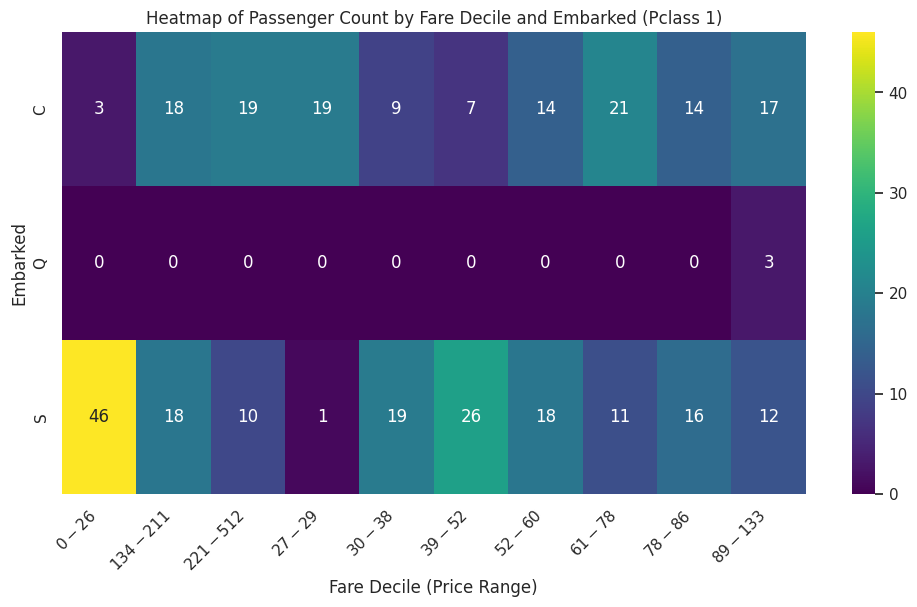

In [ ]:
# 1. Calculate deciles and get range labels
df_merged_pclass1.loc[:, 'Fare_Decile'] = pd.qcut(
    df_merged_pclass1['Fare'], 10, labels=False, duplicates='drop'
)

# Get the fare ranges for each decile
fare_ranges = df_merged_pclass1.groupby('Fare_Decile')['Fare'].agg(['min', 'max'])
labels = [f"${int(row['min'])}-${int(row['max'])}" for _, row in fare_ranges.iterrows()]

# Map decile numbers to range labels
df_merged_pclass1.loc[:, 'Fare_Category'] = df_merged_pclass1['Fare_Decile'].map(dict(enumerate(labels)))

# 2. Create a pivot table with count as the aggregation function
fare_heatmap_data = pd.pivot_table(
    df_merged_pclass1,
    values='PassengerId',
    index='Embarked',
    columns='Fare_Category',
    aggfunc='count',
    fill_value=0
)

# 3. Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(fare_heatmap_data, annot=True, cmap='viridis', fmt=".0f")
plt.title('Heatmap of Passenger Count by Fare Decile and Embarked (Pclass 1)')
plt.xlabel('Fare Decile (Price Range)')
plt.ylabel('Embarked')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Filtered dataset to Fare between $75-90
df_filtered = df_merged_pclass1[(df_merged_pclass1['Fare'] > 70) & (df_merged_pclass1['Fare'] < 90)]

In [ ]:
fare_stats = df_merged_pclass1.groupby('Embarked')['Fare'].describe()
fare_stats['median'] = df_merged_pclass1.groupby('Embarked')['Fare'].median()
print(fare_stats)

          count        mean        std      min      25%      50%      75%  \
Embarked                                                                     
C         141.0  106.845330  96.837527  25.7417  49.5042  76.7292  134.500   
Q           3.0   90.000000   0.000000  90.0000  90.0000  90.0000   90.000   
S         177.0   72.148094  61.995107   0.0000  26.5500  52.0000   83.475   

               max   median  
Embarked                     
C         512.3292  76.7292  
Q          90.0000  90.0000  
S         263.0000  52.0000  


$80 fare that was paid by these two passengers is closer to the median of C than the median of S. Embarked can be set to "C" for these two passengers.

#### Predicting missing Fare data

In [ ]:
# Filter to missing Fare data
missing_fare = df_merged[df_merged['Fare'].isnull()]

# Print rows
print(missing_fare)

      PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
1043         1044       NaN       3  Storey, Mr. Thomas  male  60.5      0   

      Parch Ticket  Fare Cabin Embarked  TestYes Ticket_Number Ticket_Group  \
1043      0   3701   NaN   NaN        S        1          3701      Regular   

     Title  Siblings  Spouse  Parents  Children  
1043    Mr         0       0        0         0  


In [ ]:
# Filter to other passengers in 3rd class, embarking from Southampton
filtered_df = df_merged[(df_merged['Pclass'] == 3) & (df_merged['Embarked'] == 'S')]

# Calculate fare statistics
fare_stats = filtered_df['Fare'].describe()
fare_stats['median'] = filtered_df['Fare'].median()

# Print the results
print(fare_stats)

count     494.000000
mean       14.435422
std        13.118281
min         0.000000
25%         7.854200
50%         8.050000
75%        15.900000
max        69.550000
median      8.050000
Name: Fare, dtype: float64


Missing fare for this passenger can be set to the median fare for 3rd class passengers embarking from Southampton.

#### Clean data

In [ ]:
# Remove feature "Cabin" from df_merged dataset
df_merged.drop('Cabin', axis=1, inplace=True)

# Set Embarked = C for PassengerId 62 and 830
df_merged.loc[df_merged['PassengerId'].isin([62, 830]), 'Embarked'] = 'C'

# Set Fare =8.05 for PassengerId 1044
df_merged.loc[df_merged['PassengerId'] == 1044, 'Fare'] = 80.5

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Pclass         1309 non-null   int64  
 3   Name           1309 non-null   object 
 4   Sex            1309 non-null   object 
 5   Age            1046 non-null   float64
 6   SibSp          1309 non-null   int64  
 7   Parch          1309 non-null   int64  
 8   Ticket         1309 non-null   object 
 9   Fare           1309 non-null   float64
 10  Embarked       1309 non-null   object 
 11  TestYes        1309 non-null   int64  
 12  Ticket_Number  1309 non-null   object 
 13  Ticket_Group   1309 non-null   object 
 14  Title          1309 non-null   object 
 15  Siblings       1309 non-null   int64  
 16  Spouse         1309 non-null   int64  
 17  Parents        1309 non-null   int64  
 18  Children

In [ ]:
# Download df_merged as csv
df_merged.to_csv('df_merged.csv', index=False)

In [ ]:
# Convert Sex, Embarked, Ticket_Group and Title to numeric categorical variables
df_merged['Sex_code'] = pd.Categorical(df_merged['Sex']).codes
df_merged['Embarked_code'] = pd.Categorical(df_merged['Embarked']).codes
df_merged['Ticket_Group_code'] = pd.Categorical(df_merged['Ticket_Group']).codes
df_merged['Title_Code'] = pd.Categorical(df_merged['Title']).codes

### Predicting age

#### Preliminary Prediction

In [ ]:
# Regress Age on Fare, Pclass
age_model1 = smf.ols(formula='Age ~ Fare + C(Pclass)', data=df_merged).fit()
print(age_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     75.90
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.09e-44
Time:                        07:20:54   Log-Likelihood:                -4171.2
No. Observations:                1046   AIC:                             8350.
Df Residuals:                    1042   BIC:                             8370.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         41.7443      1.148     36.

In [ ]:
# Regress Age on Fare, Pclass, SibSp and Parch
age_model2 = smf.ols(formula='Age ~ Fare + C(Pclass) + SibSp + Parch', data=df_merged).fit()
print(age_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     61.82
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           1.71e-56
Time:                        07:20:54   Log-Likelihood:                -4138.5
No. Observations:                1046   AIC:                             8289.
Df Residuals:                    1040   BIC:                             8319.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         41.9697      1.116     37.

In [ ]:
# Regression3: trial and error to get lowest p-values, however Parents and Children variables cannot be used to predict missing age values
age_model3 = smf.ols(formula='Age ~ C(Pclass) + Parents + Children + C(Embarked_code) + C(Title_Code)', data=df_merged).fit()
print(age_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     86.05
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          1.35e-137
Time:                        07:20:54   Log-Likelihood:                -3934.7
No. Observations:                1046   AIC:                             7893.
Df Residuals:                    1034   BIC:                             7953.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                25.12

In [ ]:
# Regress Age on Fare + C(Pclass) + SibSp + Parch + Sex_code + C(Embarked_code) + C(Ticket_Group_code) + C(Title_Code)
age_model4 = smf.ols(formula='Age ~ C(Pclass) + Parch + C(Embarked_code) + C(Title_Code)', data=df_merged).fit()
print(age_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     76.28
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          7.92e-117
Time:                        07:20:54   Log-Likelihood:                -3985.8
No. Observations:                1046   AIC:                             7994.
Df Residuals:                    1035   BIC:                             8048.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                15.40

In [ ]:
# Make age predictions for missing data
df_merged['Age_Predicted1'] = age_model1.predict(df_merged)
df_merged['Age_Predicted2'] = age_model2.predict(df_merged)
df_merged['Age_Predicted4'] = age_model4.predict(df_merged)

# Download df_merged as csv
df_merged.to_csv('df_merged.csv', index=False)

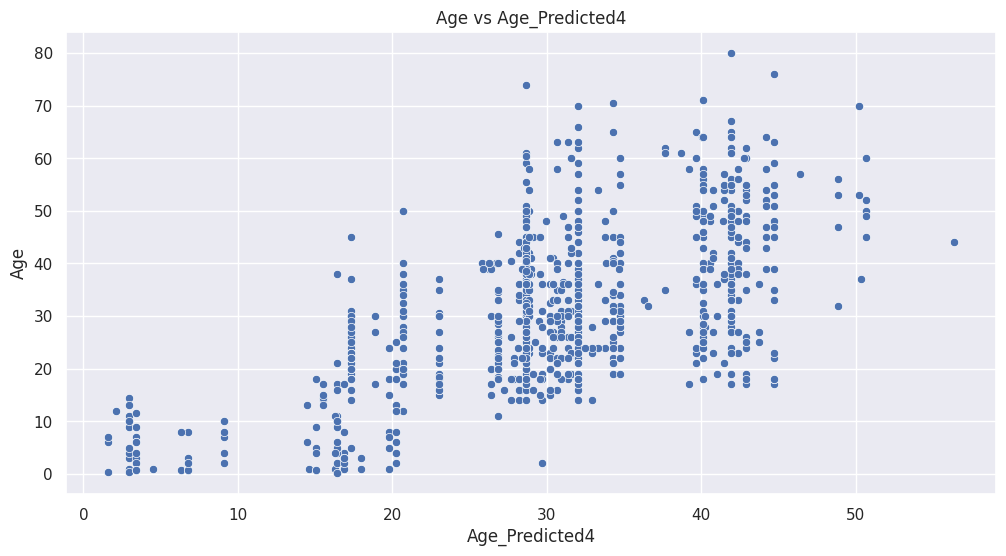

In [ ]:
# Plot Age_Predicted4 vs Age for samples where Age is not missing
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age_Predicted4', y='Age', data=df_merged[~df_merged['Age'].isnull()])
plt.title('Age vs Age_Predicted4')
plt.xlabel('Age_Predicted4')
plt.ylabel('Age')
plt.show()

#### Updating Siblings, Spouse, Parents and Children Using Preliminary Predictions

In [ ]:
# If Title is Master, Miss or Age < 18 then Siblings = SibSp (this is a child or unmarried person)
df_merged.loc[((df_merged['Title'].isin(['Master', 'Miss'])) | (df_merged['Age_Predicted4'] < 18)), 'Siblings'] = df_merged['SibSp']
df_merged.loc[((df_merged['Title'].isin(['Master', 'Miss'])) | (df_merged['Age_Predicted4'] < 18)), 'Spouse'] = 0

# If Title is Mr, Mrs, Royalty or Officer and Age >= 18, SibSp > 0, then Spouse = 1
df_merged.loc[((df_merged['Title'].isin(['Mr', 'Mrs', 'Royalty', 'Officer'])) & (df_merged['Age_Predicted4'] >= 18) & (df_merged['SibSp'] > 0)), 'Spouse'] = 1
df_merged.loc[((df_merged['Title'].isin(['Mr', 'Mrs', 'Royalty', 'Officer'])) & (df_merged['Age_Predicted4'] >= 18) & (df_merged['SibSp'] > 0)), 'Siblings'] = df_merged['SibSp'] - df_merged['Spouse']

# If Title is Master, Miss or Age <= 20 then Parents = Parch (this is a child/young adult traveling with parents)
df_merged.loc[((df_merged['Title'].isin(['Master', 'Miss'])) | (df_merged['Age_Predicted4'] <= 20)), 'Parents'] = df_merged['Parch']
df_merged.loc[((df_merged['Title'].isin(['Master', 'Miss'])) | (df_merged['Age_Predicted4'] <= 20)), 'Children'] = 0

# If Title is Mr, Mrs, Royalty or Officer and Age > 20, Parch > 0 then Children = Parch
df_merged.loc[((df_merged['Title'].isin(['Mr', 'Mrs', 'Royalty', 'Officer'])) & (df_merged['Age_Predicted4'] > 20) & (df_merged['Parch'] > 0)), 'Children'] = df_merged['Parch']
df_merged.loc[((df_merged['Title'].isin(['Mr', 'Mrs', 'Royalty', 'Officer'])) & (df_merged['Age_Predicted4'] > 20) & (df_merged['Parch'] > 0)), 'Parents'] = 0


In [ ]:
# Download df_merged as csv
df_merged.to_csv('df_merged.csv', index=False)

#### Rerunning Best Age Prediction

In [ ]:
# Regression3: trial and error to get lowest p-values, however Parents and Children variables cannot be used to predict missing age values
age_model3 = smf.ols(formula='Age ~ C(Pclass) + Parents + Children + Spouse + C(Embarked_code) + C(Title_Code)', data=df_merged).fit()
print(age_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     74.37
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          1.43e-130
Time:                        07:20:54   Log-Likelihood:                -3948.9
No. Observations:                1046   AIC:                             7924.
Df Residuals:                    1033   BIC:                             7988.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                24.91

In [ ]:
df_merged['Age_Predicted3'] = age_model3.predict(df_merged)

# Download df_merged as csv
df_merged.to_csv('df_merged.csv', index=False)

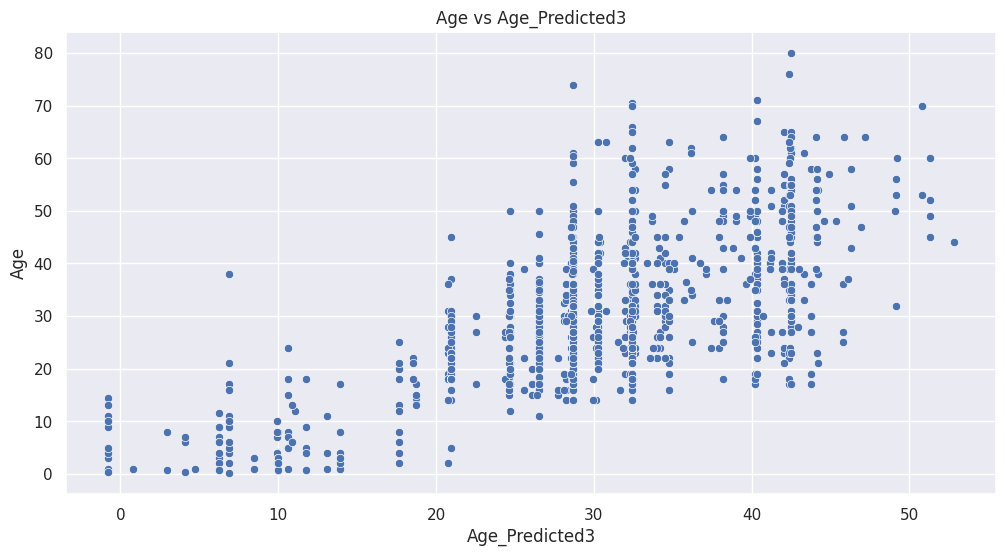

In [ ]:
# Plot Age_Predicted3 vs Age for samples where Age is not missing
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age_Predicted3', y='Age', data=df_merged[~df_merged['Age'].isnull()])
plt.title('Age vs Age_Predicted3')
plt.xlabel('Age_Predicted3')
plt.ylabel('Age')
plt.show()

In [ ]:
# For missing values of Age, replace Age with Age_Predicted3
df_merged['Age'] = df_merged['Age'].fillna(df_merged['Age_Predicted3'])

# Remove Age_Predicted1, Age_Predicted2, Age_Predicted3 and Age_Predicted4 columns
df_merged.drop(['Age_Predicted1', 'Age_Predicted2', 'Age_Predicted3', 'Age_Predicted4'], axis=1, inplace=True)

# Download df_merged as csv
df_merged.to_csv('df_merged.csv', index=False)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        1309 non-null   int64  
 1   Survived           891 non-null    float64
 2   Pclass             1309 non-null   int64  
 3   Name               1309 non-null   object 
 4   Sex                1309 non-null   object 
 5   Age                1309 non-null   float64
 6   SibSp              1309 non-null   int64  
 7   Parch              1309 non-null   int64  
 8   Ticket             1309 non-null   object 
 9   Fare               1309 non-null   float64
 10  Embarked           1309 non-null   object 
 11  TestYes            1309 non-null   int64  
 12  Ticket_Number      1309 non-null   object 
 13  Ticket_Group       1309 non-null   object 
 14  Title              1309 non-null   object 
 15  Siblings           1309 non-null   int64  
 16  Spouse             1309 